11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


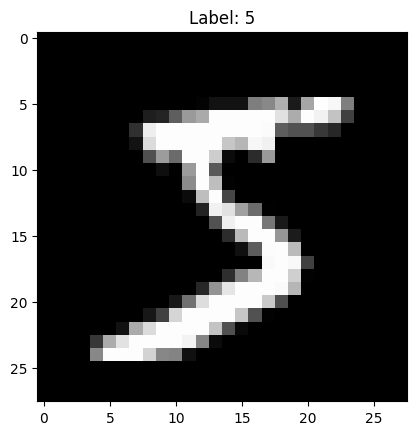

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8775 - loss: 0.4323 - val_accuracy: 0.9619 - val_loss: 0.1289
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9651 - loss: 0.1191 - val_accuracy: 0.9702 - val_loss: 0.0968
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9780 - loss: 0.0750 - val_accuracy: 0.9736 - val_loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9736 - val_loss: 0.0838
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9868 - loss: 0.0412 - val_accuracy: 0.9776 - val_loss: 0.0738
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0842

✅ Test Accuracy: 0.9776


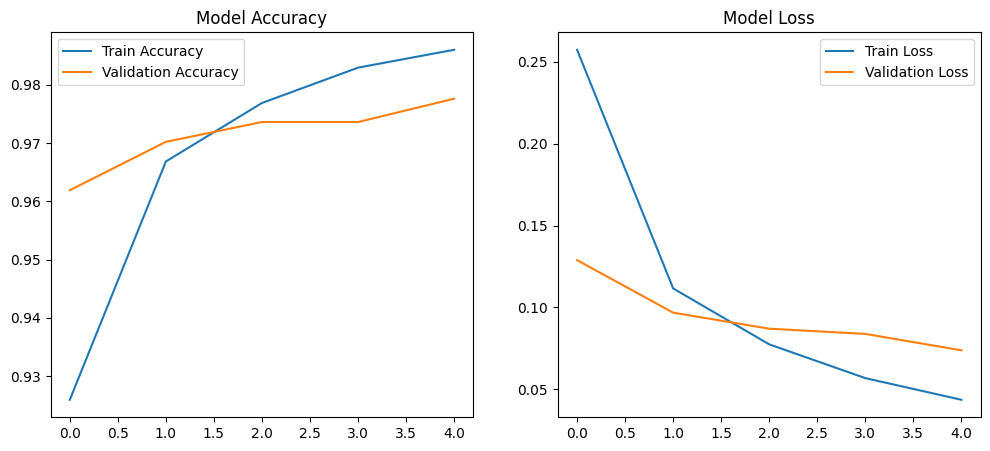

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


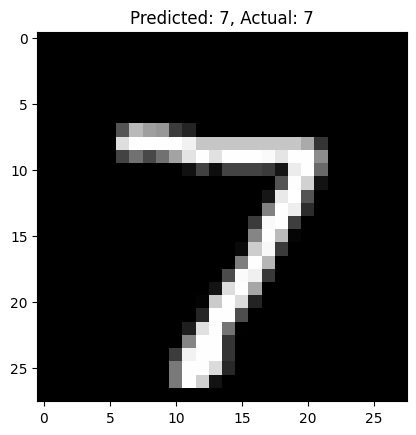

In [1]:
# 🚀 MNIST Image Classification Project Using TensorFlow

# Step 1: Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 3: Visualize Sample Image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Step 4: Preprocess Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 5: Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 6: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 8: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 9: Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Step 10: Make Predictions
predictions = model.predict(x_test)

# Step 11: Visualize Predictions
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.show()

# Step 12: Save Model (Optional)
model.save("mnist_model.h5")
